Load basic libraries 

In [42]:
import dimcli
from dimcli.shortcuts import dslquery
import pandas as pd
from pandas.io.json import json_normalize
import plotly_express as px

### Get a list of institutions so to extract the one we are interested in

In [3]:
dslquery("""search publications where research_orgs.name="Rotterdam" return research_orgs""").as_dataframe().head()

,acronym,count,country_name,id,name
0,EUR,28060,Netherlands,grid.6906.9,Erasmus University Rotterdam
1,NaN,2007,Netherlands,grid.5645.2,Erasmus University Medical Center
2,NaN,853,Netherlands,grid.5477.1,Utrecht University
3,NaN,785,Netherlands,grid.414699.7,Rotterdam Eye Hospital
4,VU,734,Netherlands,grid.12380.38,VU University Amsterdam


In [4]:
GRIDID = "grid.6906.9"

### Basic statistics about the publications from this organization 

In [5]:
dslquery(f"""search publications where research_orgs.id="{GRIDID}" return publications""").stats 

{'total_count': 28060}

In [41]:
df = dslquery("""search publications where research_orgs.id="grid.6906.9" return year limit 100""").as_dataframe() 

In [39]:
df.rename(columns={"id": "year"}, inplace=True)

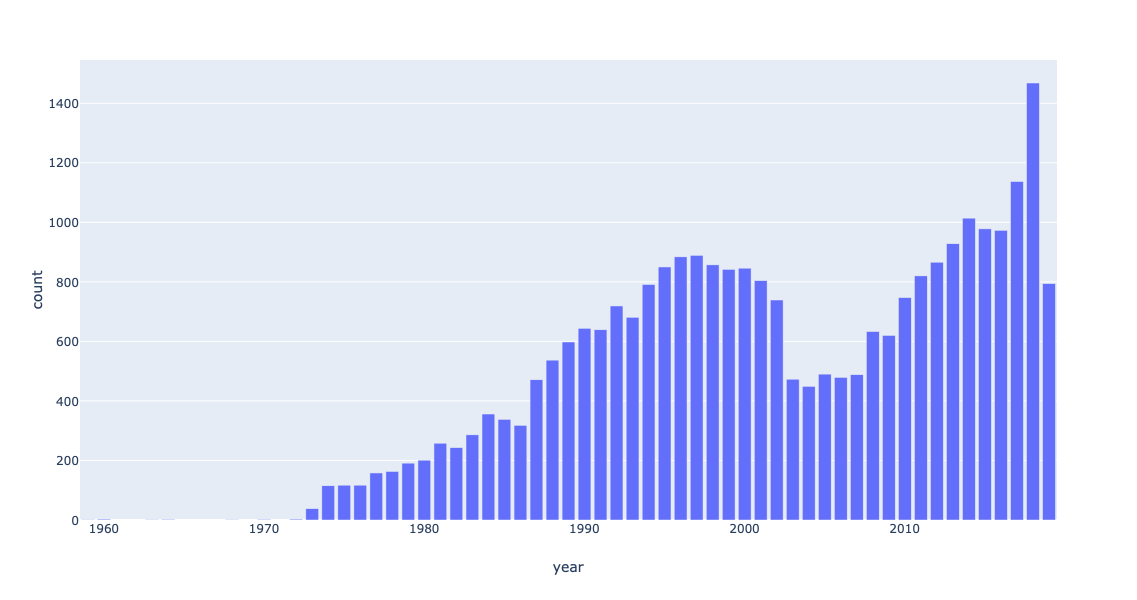

In [40]:
px.bar(df, x="year", y="count")

### Top cited publications and which areas they are in..

In recent 5 years

In [89]:
data = dslquery(f"""search publications where research_orgs.id="{GRIDID}" return publications[doi+title+recent_citations+FOR+journal] sort by recent_citations""")
df = json_normalize(data.publications)
df.head(10)

,FOR,doi,journal.id,journal.title,recent_citations,title
0,"[{'id': '3342', 'name': '1503 Business and Man...",10.1108/02683940710733115,jour.1130492,Journal of Managerial Psychology,1211,The Job Demands‐Resources model: state of the art
1,"[{'id': '3177', 'name': '1117 Public Health an...",10.3322/caac.21395,jour.1017088,CA A Cancer Journal for Clinicians,979,"Colorectal cancer statistics, 2017"
2,"[{'id': '3292', 'name': '1402 Applied Economic...",10.3109/07853890109002087,jour.1099274,Annals of Medicine,692,EQ-SD: a measure of health status from the Eur...
3,"[{'id': '3448', 'name': '1608 Sociology'}]",10.1177/0963721414531598,jour.1102713,Current Directions in Psychological Science,582,Inside the Turk
4,"[{'id': '2746', 'name': '0801 Artificial Intel...",10.1007/s11192-009-0146-3,jour.1089056,Scientometrics,573,"Software survey: VOSviewer, a computer program..."
5,"[{'id': '2353', 'name': '0103 Numerical and Co...",10.1016/s0167-5060(08)70356-x,NaN,NaN,550,Optimization and Approximation in Deterministi...
6,"[{'id': '3342', 'name': '1503 Business and Man...",10.1111/j.1540-6520.2009.00308.x,jour.1139206,Entrepreneurship Theory and Practice,444,Entrepreneurial Orientation and Business Perfo...
7,"[{'id': '3342', 'name': '1503 Business and Man...",10.1016/j.jclepro.2012.07.007,jour.1044002,Journal of Cleaner Production,410,Business models for sustainable innovation: st...
8,"[{'id': '3468', 'name': '1701 Psychology'}]",10.1016/0022-3999(94)00125-o,jour.1017827,Journal of Psychosomatic Research,375,The multidimensional Fatigue Inventory (MFI) p...
9,"[{'id': '2620', 'name': '0604 Genetics'}]",10.1038/nature17671,jour.1018957,Nature,361,Genome-wide association study identifies 74 lo...


All time

In [92]:
data = dslquery(f"""search publications where research_orgs.id="{GRIDID}" return publications[doi+title+times_cited+FOR+journal] sort by times_cited limit 1000""")
df = json_normalize(data.publications)
df.head(5)

,FOR,doi,journal.id,journal.title,times_cited,title
0,"[{'id': '2353', 'name': '0103 Numerical and Co...",10.1016/s0167-5060(08)70356-x,NaN,NaN,3227,Optimization and Approximation in Deterministi...
1,"[{'id': '2620', 'name': '0604 Genetics'}]",10.1038/35077232,jour.1018957,Nature,2587,Genome maintenance mechanisms for preventing c...
2,"[{'id': '3342', 'name': '1503 Business and Man...",10.1108/02683940710733115,jour.1130492,Journal of Managerial Psychology,2580,The Job Demands‐Resources model: state of the art
3,"[{'id': '2620', 'name': '0604 Genetics'}]",10.1016/0092-8674(91)90397-h,jour.1019114,Cell,2402,Identification of a gene (FMR-1) containing a ...
4,"[{'id': '2620', 'name': '0604 Genetics'}]",10.1038/31508,jour.1018957,Nature,2348,Association of missense and 5′-splice-site mut...


Breaking up the FOR codes..

First we need to ensure all publications have the 'FOR' key, otherwise pandas will break.

In [93]:
for x in data.publications:
    if not 'FOR' in x:
        x['FOR'] = []    

In [94]:
df = json_normalize(data.publications, record_path='FOR', meta=['doi', 'title', 'times_cited', ['journal', 'title']], errors='ignore' )
df.head()

,id,name,doi,title,times_cited,journal.title
0,2353,0103 Numerical and Computational Mathematics,10.1016/s0167-5060(08)70356-x,Optimization and Approximation in Deterministi...,3227,nan
1,2620,0604 Genetics,10.1038/35077232,Genome maintenance mechanisms for preventing c...,2587,Nature
2,3342,1503 Business and Management,10.1108/02683940710733115,The Job Demands‐Resources model: state of the art,2580,Journal of Managerial Psychology
3,2620,0604 Genetics,10.1016/0092-8674(91)90397-h,Identification of a gene (FMR-1) containing a ...,2402,Cell
4,2620,0604 Genetics,10.1038/31508,Association of missense and 5′-splice-site mut...,2348,Nature


#### Distribution of pubs research areas codes for top 1000 cited publications 

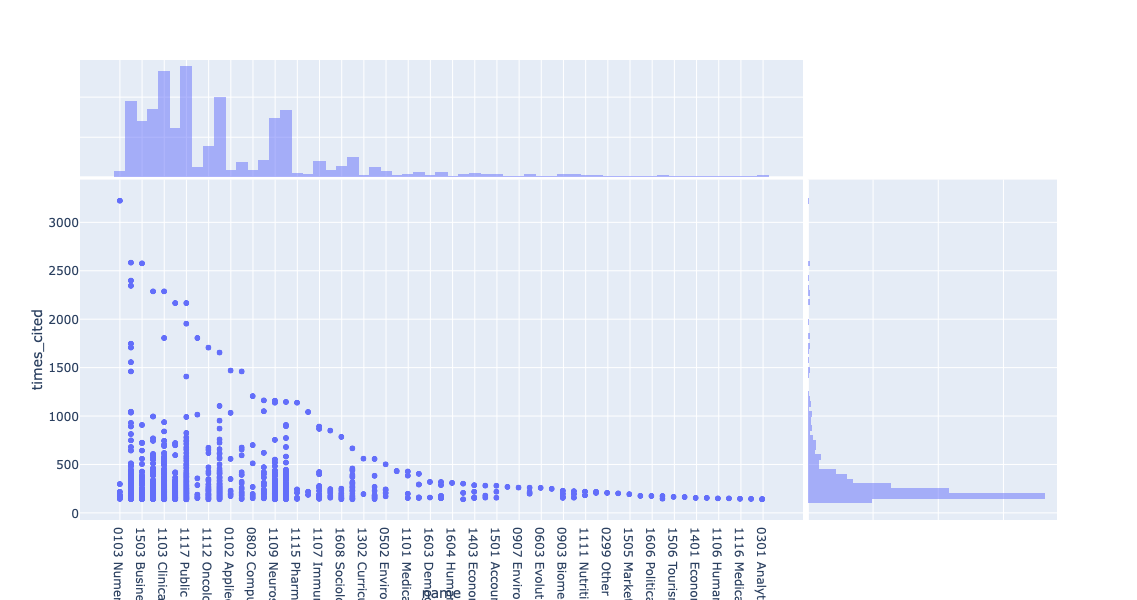

In [95]:
df = json_normalize(data.publications, record_path='FOR', meta=['doi', 'title', 'times_cited', ['journal', 'title']], errors='ignore' )
px.scatter(df, x="name", y="times_cited", marginal_x="histogram", marginal_y="histogram")

#### Distribution of pubs journals for top 1000 cited publications 

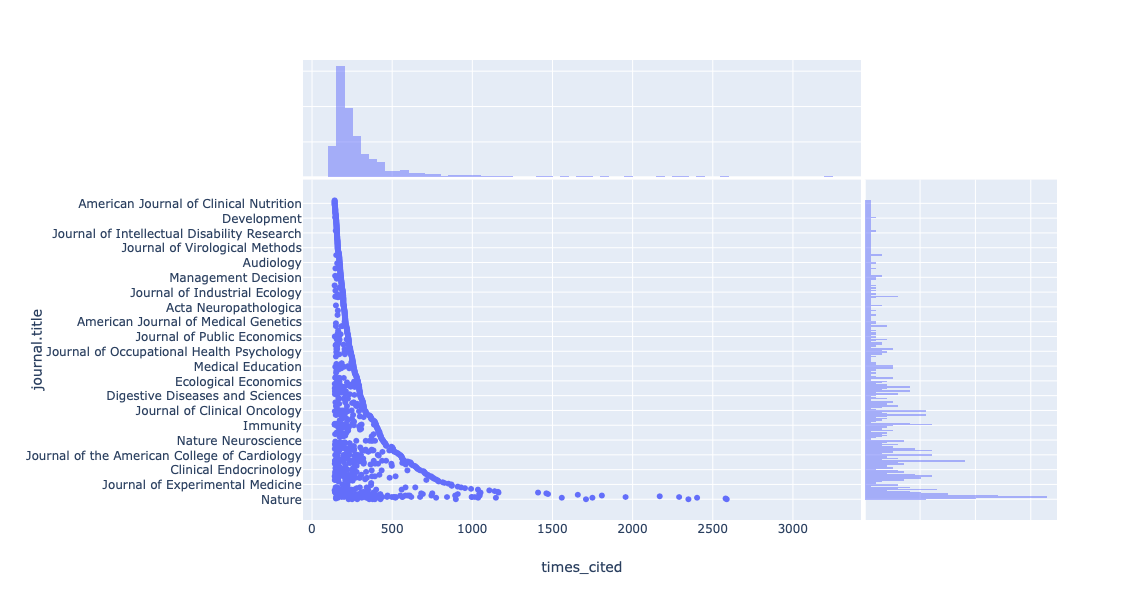

In [97]:
df = json_normalize(data.publications)
px.scatter(df, x="times_cited", y="journal.title", marginal_x="histogram", marginal_y="histogram")

## Basic Funders Report

In [103]:
fundersdata = dslquery(f"""search grants where research_orgs.id="{GRIDID}" return funders aggregate funding sort by funding""")
df = fundersdata.as_dataframe()
df.head(20)

,acronym,count,country_name,funding,id,name
0,EC,352,Belgium,661484061.0,grid.270680.b,European Commission
1,MRC,38,United Kingdom,158741793.0,grid.14105.31,Medical Research Council
2,ERC,11,Belgium,19992223.0,grid.452896.4,European Research Council
3,NWO,699,Netherlands,14727593.0,grid.420488.2,Netherlands Organisation for Scientific Research
4,EPSRC,5,United Kingdom,8627609.0,grid.421091.f,Engineering and Physical Sciences Research Cou...
5,ESRC,9,United Kingdom,7567434.0,grid.434257.3,Economic and Social Research Council
6,AICR,13,United Kingdom,3643649.0,grid.453093.8,Worldwide Cancer Research
7,BBSRC,4,United Kingdom,2863256.0,grid.418100.c,Biotechnology and Biological Sciences Research...
8,AHRC,1,United Kingdom,2685118.0,grid.426413.6,Arts and Humanities Research Council
9,ARC,9,Australia,2221700.0,grid.413452.5,Australian Research Council


### Amount of funding compared by funders and countries

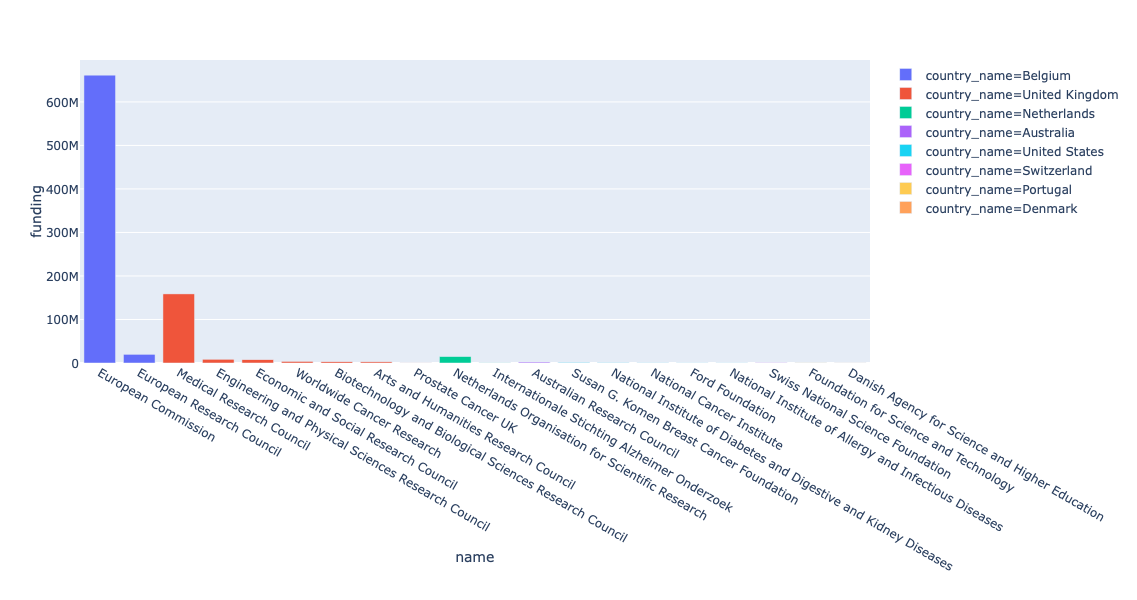

In [111]:
px.bar(df, x="name", y="funding", color="country_name")

### No of publications VS funding

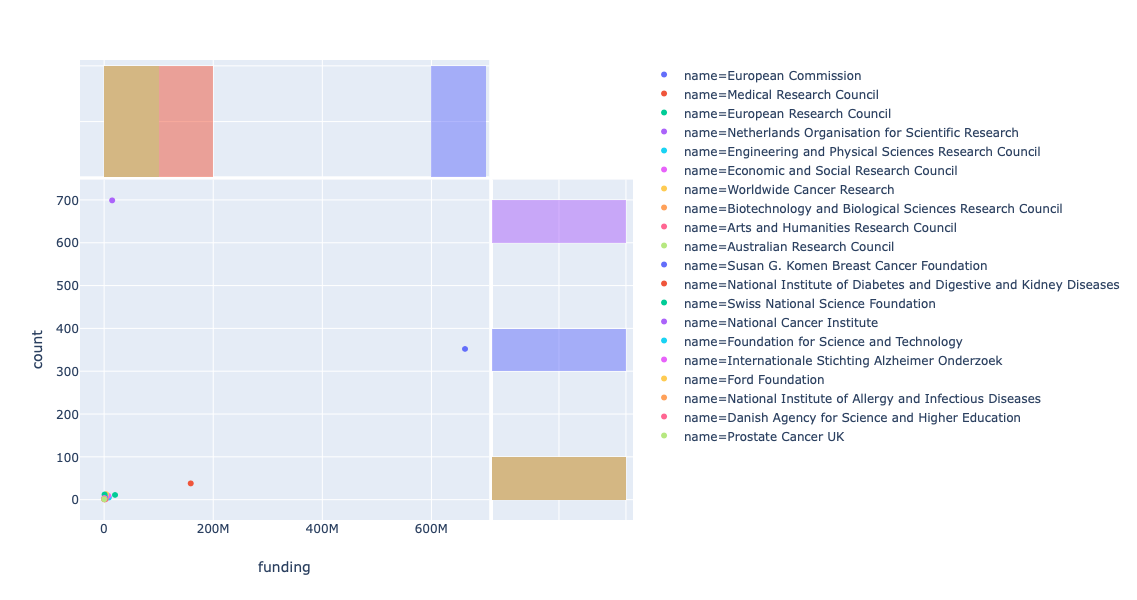

In [112]:
px.scatter(df, x="funding", y="count", color="name", marginal_x="histogram", marginal_y="histogram")